# <font color = '#e64626'><center>QBUS6810 Group Assignment</center></font>
### <center>Group 18: 490347812, , , , , </center>

# Table of Contents

1. [Data Processing](#data_processing)
2. [Exploratory Data Analysis](#eda)
3. [Feature Engineering](#feature_engineering)
4. [Methodology](#methodology)
<br> 4.1 [Model 1: *model name*](#model_1)
<br> 4.2 [Model 2: *model name*](#model_2)
<br> 4.3 [Model 3: *model name*](#model_3)
<br> 4.4 [Model 4: *model name*](#model_4)
<br> 4.5 [Model 5: *model name*](#model_5)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd


from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,RidgeCV, Ridge,LassoCV, Lasso,ElasticNetCV, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# import statsmodels.api as sm
# import nltk
# import ast
# from nltk.tokenize import word_tokenize as wt

In [2]:
rc = {"xtick.labelsize": 12, "ytick.labelsize": 12, "axes.labelsize": 15, 
      "axes.titlesize": 15, "legend.fontsize": 12}
sns.set_context("notebook", rc=rc)  

## <font color = '#e64626'><a id='data_processing'>1. Data Processing</a></font>

In [3]:
train_4000 = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = pd.concat([train_4000,test],axis=0).reset_index(drop=True)

y = train['price'][:4000]
y_train_log = np.log(y_train)

In [4]:
train["host_response_time"] = train["host_response_time"].fillna('Others')
host_dummies = pd.get_dummies(train[["host_response_time","host_is_superhost","host_identity_verified","instant_bookable"]],drop_first=True)

train["host_response_rate"] = train["host_response_rate"].str.rstrip('%').astype('float') / 100.0
train["host_acceptance_rate"] = train["host_acceptance_rate"].str.rstrip('%').astype('float') / 100.0

train["host_response_rate"] = train["host_response_rate"].fillna(0)
train["host_acceptance_rate"] = train["host_acceptance_rate"].fillna(0)

In [5]:
train["host_verifications_clean"] = train['host_verifications'].astype('object')
for i in range(len(train["host_verifications"])):
    if train.loc[i,"host_verifications"] == "[]":
        train.at[i,"host_verifications_clean"] = []
    else:
        train.at[i,"host_verifications_clean"] = train.loc[i,"host_verifications"][2:-2].split("', '")
    
train['host_verifications_counts'] = [len(i) for i in train["host_verifications_clean"]]

In [6]:
train['Host Days'] = (pd.to_datetime('2022-11-01') - pd.to_datetime(train['host_since']))/np.timedelta64(1, 'D')

In [7]:
type_dummies = pd.get_dummies(train[['property_type','room_type']],drop_first=True)

In [9]:
review_scores = train[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

In [169]:
review_numbers = np.log(train[['number_of_reviews','reviews_per_month']])

In [477]:
train['amenities_clean'] = np.nan
train['amenities_clean'] = train['amenities_clean'].astype('object')

for i in tqdm(range(len(train['amenities']))):
    train.at[i,'amenities_clean'] = train.loc[i,'amenities'][2:-2].split('", "')
    
for i in tqdm(range(len(train['amenities_clean']))):
    for j in range(len(train.loc[i,'amenities_clean'])):
        if 'Fast wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Fast Wifi'
        if 'Wifi \\u2013' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Wifi'
        if 'HDTV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'HD Television'
        if 'TV' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'TV'
        if 'body soap' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Body soap'
        if 'shampoo' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shampoo'
        if 'refrigerator' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'fridge' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Refrigerator'
        if 'conditioner' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Conditioner'
        if 'stove' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Stove'
        if 'oven' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Oven'
        if 'sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Sound system' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sound system'
        if 'Clothing storage' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Clothing storage'
        if 'Children\\u2019s books and toys' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Children\\u2019s books and toys'
        if 'Shared hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Hot tub'
        if 'Private hot tub' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private hot tub'
        if 'Shared pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Shared outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Pool'
        if 'Private pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private indoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Private outdoor pool' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private pool'
        if 'Free washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Paid washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Paid Washer'
        if 'Washer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Washer'
        if 'Dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Free dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Dryer'
        if 'Paid dryer' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Paid Dryer'
        if 'on premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking on premises'
        if 'off premises' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'Free street parking' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Parking off premises'
        if 'conditioning' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Air conditioning'
        if 'Game console' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Game console'
        if 'Gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'gym' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Gym'
        if 'coffee' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Coffee maker'
        if 'sauna' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Sauna'
        if 'high chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'High chair' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'High chair'
        if 'crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Crib' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Crib'
        if 'Fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        if 'Shared fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Shared garden or backyard'
        if 'Private fenced garden or backyard' in train.loc[i,'amenities_clean'][j]:
            train.loc[i,'amenities_clean'][j] = 'Private garden or backyard'
        
amen_list = train['amenities_clean'].to_list()
vectorizer = CountVectorizer(analyzer=lambda x: x)
bow = vectorizer.fit_transform(amen_list)
bow_df = pd.DataFrame(bow.todense(), columns = vectorizer.get_feature_names_out())

100%|███████████████████████████████████████| 6000/6000 [01:13<00:00, 81.93it/s]
/opt/anaconda3/envs/Newpython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## <font color = '#e64626'><a id='eda'>2. Exploratory Data Analysis</a></font>

The example provided here is to show you how to save figures of an appropriate resolution by using <tt>dpi</tt>. The <tt>bbox_inches='tight'</tt> is used to ensure that when your figure is saved, there are no cropping issues. In the example, the figure is saved as a <tt>.png</tt>, but you may also want to save your figures as a <tt>.pdf</tt>.

When you produce figures, make sure that all axes labels are readable. This notebook has been setup so that in general, the fontsizes are readable. These are defined in cell [2].

You can change the dimensions of the figure by changing the `figsize`.

In [155]:
# Both Rate Seems to have no relationship with price, they are dropped
# plt.scatter(train["host_response_rate"],y_train_log)
# plt.scatter(train["host_acceptance_rate"],y_train_log)
# plt.scatter(train["host_listings_count"],y_train_log)
# plt.scatter(train['Host Days'][:4000],y_train_log)

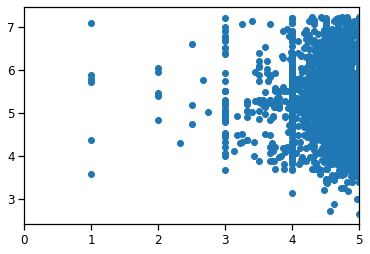

In [82]:
plt.scatter(train["review_scores_value"][:4000],y_train_log)
plt.xlim(0,5)
plt.show()

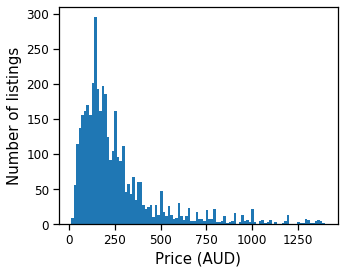

In [4]:
plt.figure(figsize=(5, 4))
plt.hist(y_train, bins=100);
plt.xlabel('Price (AUD)')
plt.ylabel('Number of listings')
plt.savefig('hist_of_response.png', dpi=300, bbox_inches='tight')

In [397]:
train[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.827904,0.796170,0.640491,0.711507,0.527271,0.799163
review_scores_accuracy,0.827904,1.000000,0.736365,0.642372,0.720729,0.529370,0.753475
review_scores_cleanliness,0.796170,0.736365,1.000000,0.523055,0.605266,0.435237,0.712360
review_scores_checkin,0.640491,0.642372,0.523055,1.000000,0.733469,0.448455,0.589374
review_scores_communication,0.711507,0.720729,0.605266,0.733469,1.000000,0.502649,0.664967
review_scores_location,0.527271,0.529370,0.435237,0.448455,0.502649,1.000000,0.525794
review_scores_value,0.799163,0.753475,0.712360,0.589374,0.664967,0.525794,1.000000


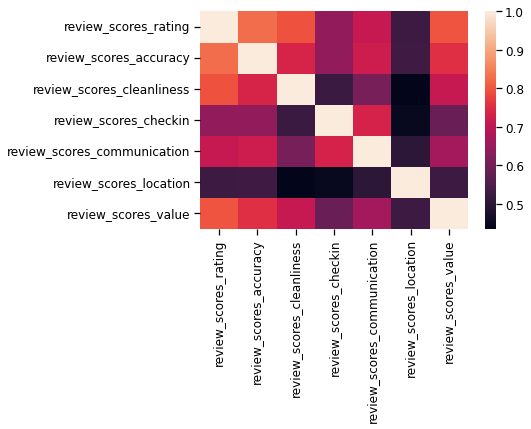

In [137]:
sns.heatmap(train[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].corr())
plt.show()

## <font color = '#e64626'><a id='feature_engineering'>3. Feature Engineering</a></font>

In [8]:
# Using accommodates to predict missing bedrooms and beds
accomm_data_temp = train[['accommodates','bedrooms','beds']].dropna()
linear_reg = LinearRegression()

linear_reg.fit(np.array(accomm_data_temp['accommodates']).reshape(-1, 1), accomm_data_temp['bedrooms'])
train.loc[train['bedrooms'].isna(),'bedrooms'] = linear_reg.predict(np.array(train.loc[train['bedrooms'].isna(),'accommodates']).reshape(-1, 1)).round(0).astype('int')

linear_reg.fit(np.array(accomm_data_temp['accommodates']).reshape(-1, 1), accomm_data_temp['beds'])
train.loc[train['beds'].isna(),'beds'] = linear_reg.predict(np.array(train.loc[train['beds'].isna(),'accommodates']).reshape(-1, 1)).round(0).astype('int')

In [277]:
acc_room_bed = np.log(train[['accommodates','bedrooms','beds']])

### Mapping Coordinates to Statistical Area 2 for more precision than neibourbood_cleased

In [316]:
sydney = gpd.read_file('SA2_sydney/sydney_SA2.shp')
sydney['region'] = sydney['geometry']
geo_train = gpd.GeoDataFrame(train, geometry=gpd.points_from_xy(train.longitude, train.latitude))
sydney.crs = "EPSG:7844"
geo_train.crs = "EPSG:7844"
geo_train_join = gpd.tools.sjoin(geo_train, sydney[['SA2_NAME21','geometry','region']], predicate="within", how='left')

geo_nan = geo_train_join[geo_train_join['SA2_NAME21'].isna()][['latitude','longitude']]
geo_nan = gpd.GeoDataFrame(geo_nan, geometry=gpd.points_from_xy(geo_nan.longitude, geo_nan.latitude))
geo_nan.crs = "EPSG:7844"

In [317]:
for i in geo_nan.index:
    geo_train_join.loc[i,'SA2_NAME21'] = sydney.loc[sydney.distance(geo_nan.loc[i,'geometry']).sort_values().index[0],'SA2_NAME21']

/var/folders/nq/xtfndg6x53g0ffw66wk7g0100000gn/T/ipykernel_28495/2434416798.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_train_join.loc[i,'SA2_NAME21'] = sydney.loc[sydney.distance(geo_nan.loc[i,'geometry']).sort_values().index[0],'SA2_NAME21']


In [595]:
# location = pd.get_dummies(geo_train_join['SA2_NAME21'])
location = pd.get_dummies(train['neighbourhood_cleansed'])
long_lat = train[['longitude','latitude']]

In [203]:
geo_plot_df = pd.DataFrame(geo_train_join[:4000].groupby('SA2_NAME21').mean()['price'])
geo_plot_df['median'] = geo_train_join[:4000].groupby('SA2_NAME21').median()['price']

In [209]:
sydney_plot = sydney.set_index('SA2_NAME21')
geo_plot = pd.concat([sydney_plot,np.log(geo_plot_df)],axis=1)

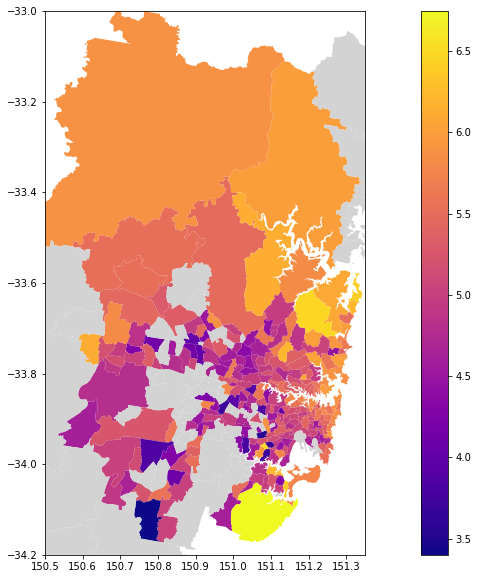

In [312]:
geo_plot.plot(column='price',figsize=(20,10),legend=True,cmap='plasma',missing_kwds= dict(color = "lightgrey"))
plt.xlim(150.5,151.35)
plt.ylim(-34.2,-33)

# plt.xlim(150.88,151.35)
# plt.ylim(-34.1,-33.7)
plt.show()

## <font color = '#e64626'><a id='methodology'>4. Methodology</a></font>

### <font color = '#e64626'><a id='model_1'>4.1. Model 1: OLS Lasso</a></font>

In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6000 non-null   int64  
 1   price                        4000 non-null   float64
 2   description                  5998 non-null   object 
 3   neighborhood_overview        5371 non-null   object 
 4   host_since                   6000 non-null   object 
 5   host_location                5078 non-null   object 
 6   host_response_time           6000 non-null   object 
 7   host_response_rate           5816 non-null   float64
 8   host_acceptance_rate         5863 non-null   float64
 9   host_is_superhost            6000 non-null   object 
 10  host_neighbourhood           3662 non-null   object 
 11  host_listings_count          6000 non-null   float64
 12  host_verifications           6000 non-null   object 
 13  host_identity_veri

<AxesSubplot:>

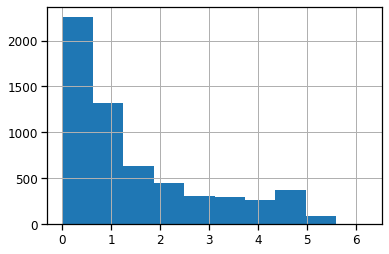

In [639]:
np.log(train['host_listings_count']).hist()

In [649]:
host_numbers = pd.concat([train[['host_verifications_counts','host_response_rate',
                                 'host_acceptance_rate','Host Days','maximum_nights','minimum_nights']],
                          np.log(train['host_listings_count'])],axis=1)

In [650]:
model1_features = pd.concat([host_dummies,host_numbers,acc_room_bed,review_scores,review_numbers,long_lat,location,type_dummies,bow_df],axis=1)[:4000]

scaler = StandardScaler()
scaler.fit(model1_features)
X_scaled = scaler.transform(model1_features)

In [651]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y_train_log, test_size = 0.2)

ols = LinearRegression()
ols.fit(X_train_scaled, y_train);

lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)
best_lasso = Lasso(alpha=lasso.alpha_);

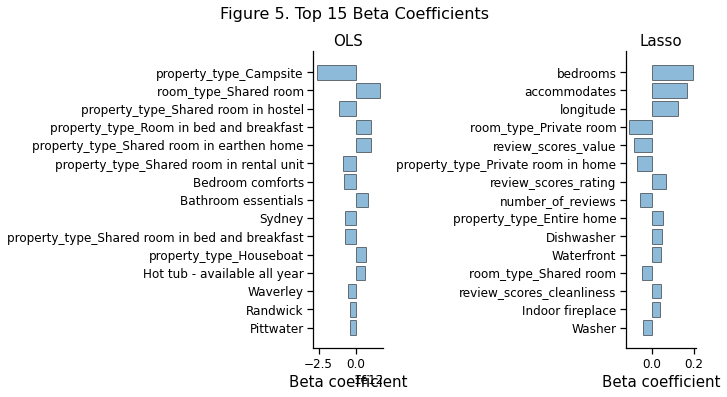

In [652]:
predictors = list(model1_features.columns.values)

n_coefs = 15
model = [ols, lasso]
model_name = ['OLS', 'Lasso']
plt.figure(figsize = (10, 10))

for i in range(len(model)):
    betas = model[i].coef_

    indicies = np.argsort(np.abs(betas))[-n_coefs:]
    top_predictors = np.array(predictors)[indicies]
    top_betas = betas[indicies]

    plt.subplot(2, 2, i+1)
    plt.barh(top_predictors, top_betas, alpha=0.5, edgecolor='black')
    sns.despine()
    plt.xlabel('Beta coefficient')
    plt.title(model_name[i]);
plt.suptitle('Figure 5. Top {} Beta Coefficients'.format(n_coefs), fontsize = 16)
plt.tight_layout()

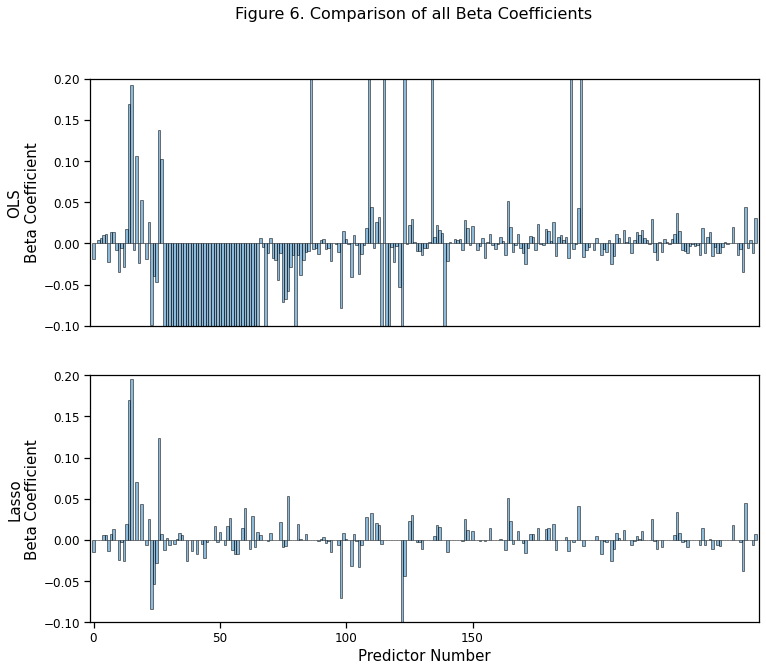

In [653]:
model = [ols, lasso]
model_name = ['OLS', 'Lasso']
p = len(predictors)

plt.figure(figsize = (12, 10))
for i in range(len(model)):
    plt.subplot(len(model), 1, i+1)
    plt.bar(np.arange(p), model[i].coef_, width=1, alpha=0.5, edgecolor = 'black')
    plt.xticks([])
    plt.xlim([-1.5, p+0.5])
    plt.ylim([-0.1, 0.2])
    plt.ylabel(model_name[i] + '\nBeta Coefficient')
plt.xticks([0, 50, 100, 150])
plt.xlabel('Predictor Number')
plt.suptitle('Figure 6. Comparison of all Beta Coefficients', fontsize=16);

In [654]:
results = pd.DataFrame(columns=['RMSE', 'R2'])

ols = LinearRegression()
y_pred = cross_val_predict(ols, X_train_scaled, y_train, cv=5)

# OLS sometimes makes crazy predictions so we clip them to something sensible
y_pred = np.clip(y_pred, y_train.min(), y_train.max())

rmse = mean_squared_error(np.exp(y_train), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_train), np.exp(y_pred))

results.loc['OLS'] = rmse, r2

y_pred = cross_val_predict(best_lasso, X_train_scaled, y_train, cv=5)

rmse = mean_squared_error(np.exp(y_train), np.exp(y_pred), squared=False)
r2 = r2_score(np.exp(y_train), np.exp(y_pred))

results.loc['Lasso'] = rmse, r2


In [655]:
results.round(2)

,RMSE,R2
OLS,148.66,0.62
Lasso,133.43,0.69


Now we need to generate the submission file.

In [6]:
# id_col = np.arange(2000).reshape(-1, 1)
# y_pred = mean_price*np.ones(2000).reshape(-1, 1)

# data = np.hstack((id_col, y_pred))

# m1_submission = pd.DataFrame(data, columns=['id', 'price'])
# m1_submission['id'] = m1_submission['id'].astype('int')

# m1_submission.to_csv('model1_submission.csv', index=False)

### <font color = '#e64626'><a id='model_2'>4.2. Model 2: *model name*</a></font>

### <font color = '#e64626'><a id='model_3'>4.2. Model 3: *model name*</a></font>

### <font color = '#e64626'><a id='model_4'>4.2. Model 4: *model name*</a></font>

### <font color = '#e64626'><a id='mode_5'>4.2. Model 5: *model name*</a></font>